## K-Means Clustering with Wholesale Data

Author: Thomas James Tiam-Lee

### Import Libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [135]:
df_wholesale = pd.read_csv('wholesale.csv')
df_wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


### Select the Features

In [136]:
X = df_wholesale[[i for i in df_wholesale.columns if i not in ['Channel', 'Region']]].to_numpy()
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

### Preprocessing

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Train the Model

In [139]:
from sklearn.cluster import KMeans

In [176]:
k=4
model = KMeans(n_clusters=k, random_state=1)

In [177]:
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [178]:
model.cluster_centers_, model.labels_

(array([[-0.50731318,  0.58556291,  0.80971598, -0.3241831 ,  0.80418162,
          0.08314832],
        [ 0.12656323, -0.37241784, -0.43122186,  0.04312416, -0.42559607,
         -0.12634983],
        [ 0.38872897,  3.94304862,  4.02164626,  0.03578413,  4.22611641,
          0.94163573],
        [ 3.84481644,  3.29952725,  0.98641347,  7.21309428, -0.15296659,
          6.80741239]]),
 array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1,
        1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 1

In [179]:
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([110, 316,  11,   3], dtype=int64))

### Plot the Clusters

Text(0, 0.5, 'Delicassen')

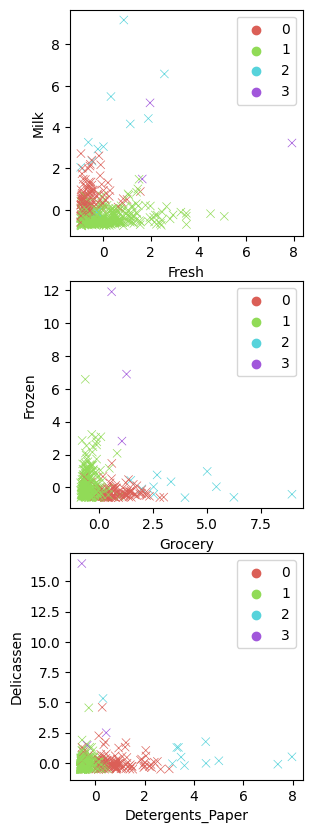

In [180]:
palette = sns.color_palette("hls", k)
fig, ax = plt.subplots(3,1,figsize=(3,10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=model.labels_, ax=ax[0], marker='x',
                palette=palette)
ax[0].set_xlabel(df_wholesale.columns[2])
ax[0].set_ylabel(df_wholesale.columns[3])
sns.scatterplot(x=X[:,2], y=X[:,3], hue=model.labels_, ax=ax[1], marker='x',
                palette=palette)

ax[1].set_xlabel(df_wholesale.columns[4])
ax[1].set_ylabel(df_wholesale.columns[5])
sns.scatterplot(x=X[:,4], y=X[:,5], hue=model.labels_, ax=ax[2], marker='x',
                palette=palette)
ax[2].set_xlabel(df_wholesale.columns[6])
ax[2].set_ylabel(df_wholesale.columns[7])

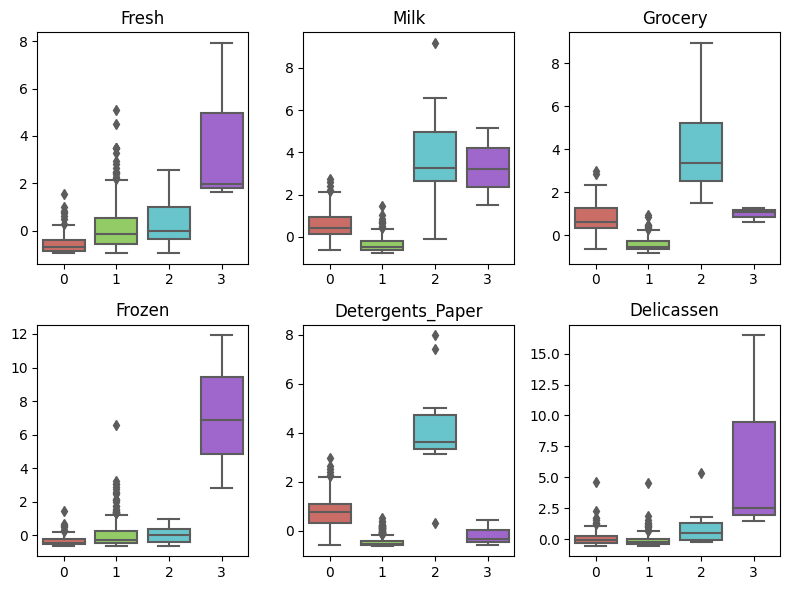

In [181]:
fig,ax=plt.subplots(2,3,figsize=(8,6))
for i, ax in enumerate(ax.flat):
  sns.boxplot(y=X[:,i],ax=ax,x=model.labels_, orient='v', palette=palette)
  ax.set_title(df_wholesale.columns[2+i])
  plt.tight_layout()

### Selecting the Best Value for $k$

In [104]:
k_list = []
sse_list = []

for k in range(2,16):
  model = KMeans(n_clusters=k, random_state=1)
  model.fit(X)
  total_sse = model.inertia_
  k_list.append(k)
  sse_list.append(total_sse)

Text(0, 0.5, 'Sum of Squared Error')

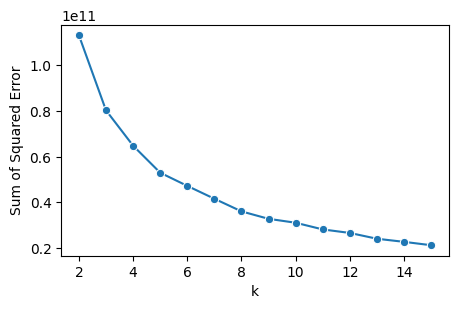

In [105]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
sns.lineplot(x=k_list, y=sse_list, marker='o', ax=ax);
ax.set_xlabel('k')
ax.set_ylabel('Sum of Squared Error')


### Miscellaneous

<AxesSubplot:>

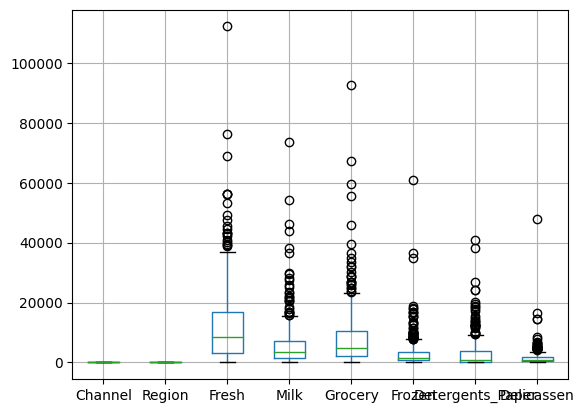

In [163]:
df_wholesale.boxplot()